### Image Deconvolution
[link to example](https://scikit-image.org/docs/stable/auto_examples/filters/plot_deconvolution.html#sphx-glr-auto-examples-filters-plot-deconvolution-py)

In this example, we deconvolve an image using Richardson-Lucy deconvolution algorithm.

The algorithm is based on PSF (Point Spread Function), where PSF is described as the impulse response of the optical system. The blurred image is sharpened through a number of iterations, which needs to be hand-tuned.

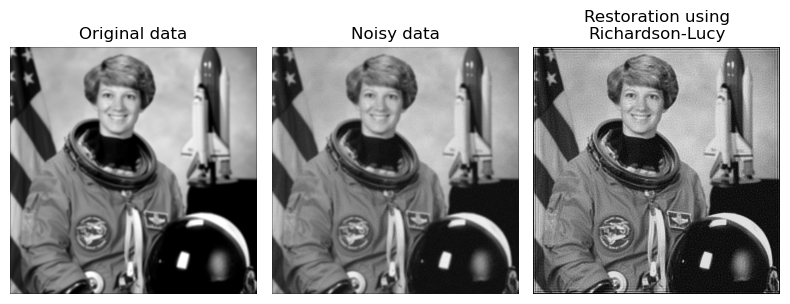

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d

from skimage import color, data, restoration

astro = color.rgb2gray(data.astronaut())
psf = np.ones((5, 5)) / 25
astro = convolve2d(astro, psf, 'same')

# Add noise to image
rng = np.random.default_rng()
astro_noisy = astro.copy()
astro_noisy += (rng.poisson(lam=25, size=astro.shape) - 10) / 255

# Restore image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, num_iter=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in ax:
    a.axis('off')

ax[0].imshow(astro)
ax[0].set_title("Original data")
ax[1].imshow(astro_noisy)
ax[1].set_title("Noisy data")
ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title("Restoration using\nRichardson-Lucy")

fig.tight_layout()
plt.show()

